# Smart Home Automation

**Team Number:** 1

**Team Members:**

*   Anirudh Jayan
*   Abhinav Variyath
*   Tara Samiksha
*   Sarvesh Ram Kumar
*   Aravind S Harilal

## Introduction & Problem Statement

**Goal:** Create a Smart Home Automation System to manage electronic devices, optimize electricity consumption, and reduce energy wastage.

**Key Features:**

*   Device management using a **Priority Queue**
*   Automation rule implementation with a **Linked List**
*   Energy-efficient device coordination

## Linked List: Structured Rule Automation System

### What is a Linked List?

A linear data structure where elements (nodes) are linked sequentially. It excels at dynamic insertion and deletion of elements.

### Why Use a Linked List for Automation Rules?

*   **Ordered Rule Execution:**  Automation rules often need to be executed in a specific sequence.
*   **Dynamic Rule Sets:** Easily add, remove, or modify rules without complex restructuring.

### Rule Execution Process

1. Rules are parsed from user input (or external sources) and converted into `Rule` objects.
2. `Rule` objects are added to the `LinkedList`.

In [1]:
import threading

class Node:  # For creation of a node. Each node contains the data and the address of the next node.
    def __init__(self, val):
        self.val = val
        self.next = None


class LinkedList:  # Linked list implementation.
    def __init__(self):
        self.head = None
        self.size = 0
        self.lock = threading.Lock()

    def add_front(self, val):  # Adding a node in the front of the linked list.
        with self.lock:
            new_node = Node(val)
            new_node.next = self.head
            self.head = new_node
            self.size += 1

    def add_end(self, val):  # Adding a node at the end of the linked list.
        new_node = Node(val)

        with self.lock:
            if not self.head:
                self.head = new_node

            else:
                temp = self.head
                while temp.next:
                    temp = temp.next
                temp.next = new_node
            self.size += 1

    def remove_front(self):  # Removes the node at the front of the linked list.
        with self.lock:
            if not self.head:
                return None
            val = self.head.val
            self.head = self.head.next
            self.size -= 1
            return val

    def remove_end(self):  # Removes the node at the end of the linked list.

        with self.lock:
            if not self.head:
                return None
            if not self.head.next:
                val = self.head.val
                self.head = None
                self.size -= 1
                return val

            temp = self.head
            while temp.next and temp.next.next:
                temp = temp.next

            val = temp.next.val
            temp.next = None
            self.size -= 1
            return val

    def peek(self):  # Gives us the data in the very first node without popping it.
        with self.lock:
            return self.head.val if self.head else None

    def peek_end(self):  # Gives us the data at the last node without popping it.
        with self.lock:
            if not self.head:
                return None
            temp = self.head
            while temp.next:
                temp = temp.next
            return temp.val

    def get_size(self):  # Gives us the size of the linked list.

        with self.lock:
            return self.size

    def print_list(self):  # Displays the entire list.

        with self.lock:
            temp = self.head
            while temp:
                print(temp.val, end=" -> ")
                temp = temp.next
            print("None")

    def clear(self):  # Clears the entire list.

        with self.lock:
            self.head = None
            self.size = 0

    def is_empty(self):  # Checks if the list is empty.

        with self.lock:
            return self.size == 0

    def peek_and_remove_end(self):  # Peek and pop the last element.
        with self.lock:
            if not self.head:
                return None  # List is empty

            if not self.head.next:
                val = self.head.val  # Only one element in the list
                self.head = None
                self.size -= 1
                return val

            temp = self.head
            while temp.next and temp.next.next:
                temp = temp.next

            val = temp.next.val  # Peek the last element
            temp.next = None  # Remove it
            self.size -= 1
            return val

    def peek_and_remove(self):  # Peeks and pops the first element
        with self.lock:
            if not self.head:
                return None  # List is empty
            val = self.head.val  # Peek the first element
            self.head = self.head.next  # Remove it
            self.size -= 1
            return val

    def sort_ll(self):
        with self.lock:
            temp_array = self._make_array_list()  # Convert linked list to a Python list
            temp_array.sort()  # Sort the list in ascending order
            self.clear()  # Clear the linked list

            for val in temp_array:  # Reinsert sorted elements into the linked list
                self.add_end(val)

    def _make_array_list(self):
        temp = self.head
        array_list = []

        while temp:
            array_list.append(temp.val)
            temp = temp.next

        return array_list

    def reverse(self):  # Reverses the array
        with self.lock:
            temp_array = self._make_array_list()
            temp_array.reverse()
            self.clear()

            for val in temp_array:
                self.add_end(val)



In [2]:
ll = LinkedList()
ll.add_end(10)
ll.add_end(20)
ll.add_front(5)
ll.print_list()
print(ll.remove_end())
print(ll.peek())
print(ll.get_size())
print(ll.peek_and_remove_end())
print(ll.peek_end())
print(ll.peek_and_remove_end())
ll.add_end(20)
print(ll.peek())
print(ll.peek_and_remove())

5 -> 10 -> 20 -> None
20
5
2
10
5
5
20
20


## Priority Queue: Intelligent & Prioritized Device Task Handling

### What is a Priority Queue?

A data structure that orders elements based on their priority, ensuring that higher priority elements are processed first.

### Why Use a Priority Queue in a Smart Home?

*   **Real-world Prioritization:**  Different devices have varying levels of importance.
    *   **Examples:**
        *   Security Alarms (High Priority)
        *   Lighting (Medium Priority)
        *   Decorative Displays (Low Priority)
*   **Resource Allocation:** Efficiently manages system resources by prioritizing critical tasks.

### Priority Calculation

The priority of a device is determined by the following formula:
Priority = Device Type Priority + Device Group Priority + (Location Occupancy * Weight)


**Example:** A security camera in an occupied living room will have a higher priority than a decorative light in an empty bedroom.

# Normal Queue
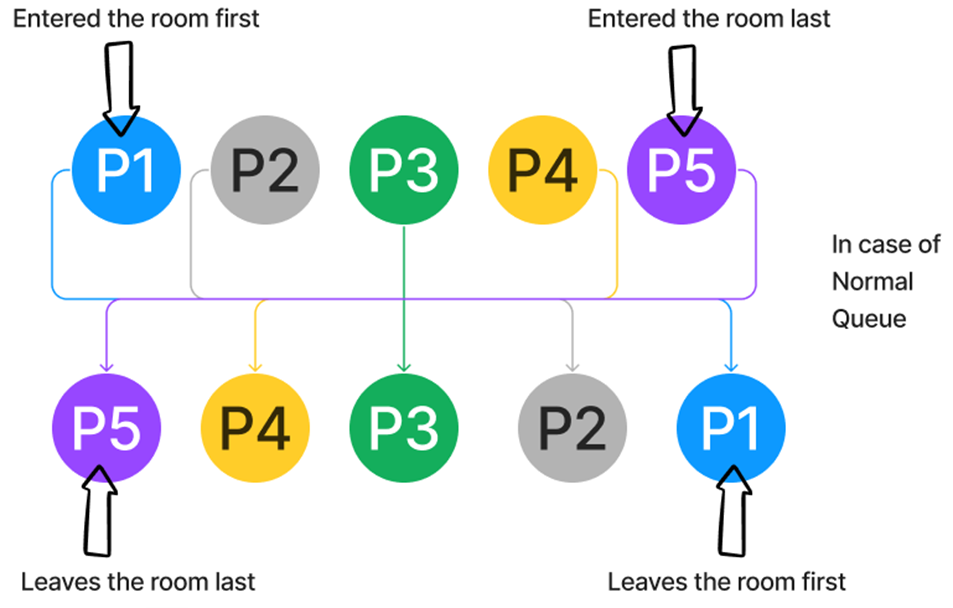

# Priority Queue
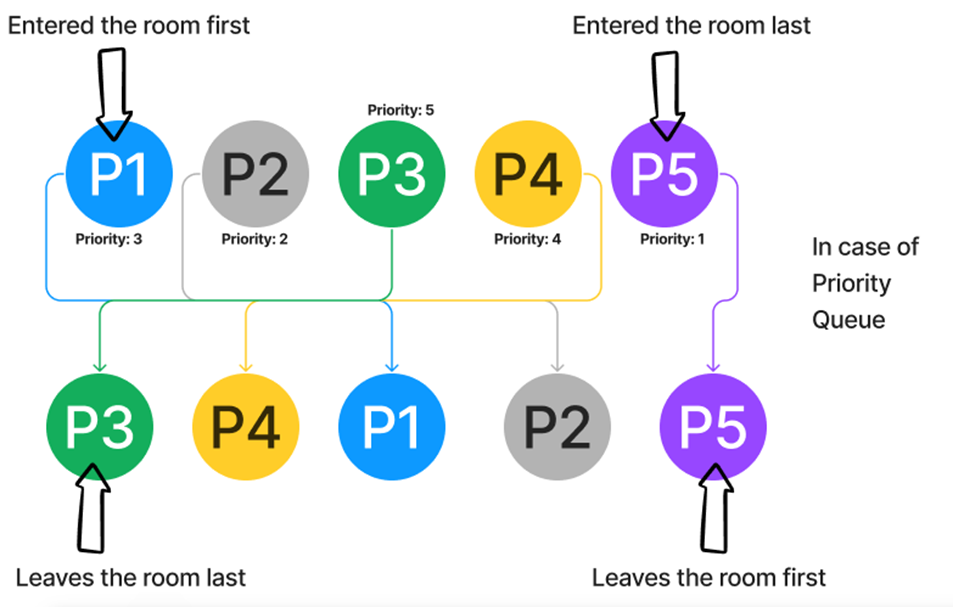

In [3]:
import threading

class Task:
    def __init__(self, task, priority):
        self.task = task
        self.priority = priority

    def getTask(self):
        return self.task

    def getPriority(self):
        return self.priority

    def setPriority(self, priority):
        self.priority = priority

    def __lt__(self, other):
        return self.priority < other.priority

    def __repr__(self):
        return f"Task(priority={self.priority}, task={self.task})"

    def __eq__(self, other):
        if isinstance(other, Task):
            return self.task == other.task and self.priority == other.priority
        return False


class PriorityQueue:
    def __init__(self, task=None):
        self.queue = LinkedList()  #Use Linked List instead of Python List
        self.lock = threading.Lock()

        if task:
            self.enqueue(task)  # Use enqueue to correctly insert into linked list.

    def enqueue(self, newTask):
         with self.lock:
            if self.queue.is_empty():
                self.queue.add_end(newTask) #Add to the end of linked list
                return

            current = self.queue.head #set the current
            prev = None #Set prev to none

            while current: #Traversing the array
                if newTask.getPriority() < current.val.getPriority():
                    #Add task to front if priority is higher.
                    if prev is None:
                        self.queue.add_front(newTask)
                    else:
                         new_node = Node(newTask)
                         new_node.next = current
                         prev.next = new_node
                         self.queue.size += 1

                    return
                prev = current
                current = current.next

            self.queue.add_end(newTask) #Add the task to the end if it is not added before
            

    def dequeue(self):  # Dequeuing the element with the most priority.
        with self.lock:
            if self.queue.is_empty():
                return None 
            return self.queue.remove_front() #Removes the front of the linked list

    def peek(self):  # Returns the element with the most priority
        with self.lock:
             if self.queue.is_empty():
                return None
             return self.queue.peek()

    def print(self):  # Prints the queue with the priorities too.
        with self.lock:
            current = self.queue.head
            while current:
                print(f"Priority: {current.val.getPriority()}, Task: {current.val.getTask()}")
                current = current.next

    def isEmpty(self):  # Checks if the queue is empty.
        with self.lock:
            return self.queue.is_empty()  # Check if linked list is empty

    def size(self):  # Checks the size of the queue.
        with self.lock:
            return self.queue.get_size()

    def clear(self):  # clears the queue.
        with self.lock:
            self.queue.clear()

    def contains(self, task):  # Checks if the task is in the queue.
        with self.lock:
            current = self.queue.head
            while current:
                if current.val == task:
                    return True
                current = current.next
            return False

    def getPriority(self, task_content):  # Gets the priority of a given task.
        with self.lock:
            current = self.queue.head
            while current:
                if current.val.getTask() == task_content:
                    return current.val.getPriority()
                current = current.next
            return -1

    def getTask(self, priority):  # Gets the first task the matches the priority.
        with self.lock:
            current = self.queue.head
            while current:
                if current.val.getPriority() == priority:
                    return current.val
                current = current.next
            return None

    def removeTask(self, task): #Removes the first matching task
        with self.lock:
            current = self.queue.head
            previous = None

            while current:
                if current.val == task: 
                    if previous:
                        previous.next = current.next  # Remove the task from the linked list
                    else:
                        self.queue.head = current.next 
                    self.queue.size -= 1
                    return
                previous = current
                current = current.next


    def removeTaskT(self, task):
        with self.lock:
            current = self.queue.head
            previous = None

            while current:
                if current.val.getTask() == task:  
                    if previous:
                        previous.next = current.next  # Remove the task from the linked list
                    else:
                        self.queue.head = current.next 
                    self.queue.size -= 1
                    return
                previous = current
                current = current.next
        
    def getTaskT(self, task): #Get Task Using the task's name
        with self.lock:
            current = self.queue.head
            while current:
                if current.val.getTask() == task:
                    return current.val
                current = current.next
            return None

    def updatePriority(self, task, priority): #Updates the priority of the task.
        with self.lock:
          self.removeTask(task)
          task.setPriority(priority)
          self.enqueue(task)

# Testing the code
pq = PriorityQueue()
pq.enqueue(Task("Do laundry", 3))
pq.enqueue(Task("Finish report", 1))
pq.enqueue(Task("Buy groceries", 2))

print("\nQueue after enqueuing:")
pq.print()

print("\nDequeuing highest priority task")
pq.dequeue()
pq.print()

print("\nPeeking at the highest priority task:")
print(pq.peek(), "\n")

pq.print()


Queue after enqueuing:
Priority: 1, Task: Finish report
Priority: 2, Task: Buy groceries
Priority: 3, Task: Do laundry

Dequeuing highest priority task
Priority: 2, Task: Buy groceries
Priority: 3, Task: Do laundry

Peeking at the highest priority task:
Task(priority=2, task=Buy groceries) 

Priority: 2, Task: Buy groceries
Priority: 3, Task: Do laundry


## Energy-Efficient Device Coordination

This system employs a two-pronged approach to optimize energy consumption:

### 1. Rule-Based Energy Optimization (Linked List)

*   Users can define energy-saving rules, such as:
    *   "If the time is after 11 PM and motion is not detected in the living room for 15 minutes, turn off the living room lights."
*   The `LinkedList` ensures that these rules are executed efficiently and in the correct order.

In [4]:
class Rule:
    def __init__(self, device_id, flip_state, turn_on, turn_off, set_power_level, power_level, group_name,
                 turn_group_off,
                 turn_group_on, type_name, turn_type_off, turn_type_on, location_name, turn_location_off,
                 turn_location_on):
        self.__deviceId = device_id
        self.__flipState = flip_state
        self.__turnOn = turn_on
        self.__turnOff = turn_off
        self.__setPowerLevel = set_power_level
        self.__powerLevel = power_level
        self.__groupName = group_name
        self.__turnGroupOff = turn_group_off
        self.__turnGroupOn = turn_group_on
        self.__typeName = type_name
        self.__turnTypeOff = turn_type_off
        self.__turnTypeOn = turn_type_on
        self.__locationName = location_name
        self.__turnLocationOff = turn_location_off
        self.__turnLocationOn = turn_location_on

    def get_device_id(self):
        return self.__deviceId

    def set_device_id(self, device_id):
        self.__deviceId = device_id

    def get_flip_state(self):
        return self.__flipState

    def set_flip_state(self, flip_state):
        self.__flipState = flip_state

    def get_turn_on(self):
        return self.__turnOn

    def set_turn_on(self, turn_on):
        self.__turnOn = turn_on

    def get_turn_off(self):
        return self.__turnOff

    def set_turn_off(self, turn_off):
        self.__turnOff = turn_off

    def get_set_power_level(self):
        return self.__setPowerLevel

    def set_set_power_level(self, set_power_level):
        self.__setPowerLevel = set_power_level

    def get_power_level(self):
        return self.__powerLevel

    def set_power_level(self, power_level):
        self.__powerLevel = power_level

    def get_group_name(self):
        return self.__groupName

    def set_group_name(self, group_name):
        self.__groupName = group_name

    def get_turn_group_off(self):
        return self.__turnGroupOff

    def set_turn_group_off(self, turn_group_off):
        self.__turnGroupOff = turn_group_off

    def get_turn_group_on(self):
        return self.__turnGroupOn

    def set_turn_group_on(self, turn_group_on):
        self.__turnGroupOn = turn_group_on

    def get_type_name(self):
        return self.__typeName

    def set_type_name(self, type_name):
        self.__typeName = type_name

    def get_turn_type_off(self):
        return self.__turnTypeOff

    def set_turn_type_off(self, turn_type_off):
        self.__turnTypeOff = turn_type_off

    def get_turn_type_on(self):
        return self.__turnTypeOn

    def set_turn_type_on(self, turn_type_on):
        self.__turnTypeOn = turn_type_on

    def get_location_name(self):
        return self.__locationName

    def set_location_name(self, location_name):
        self.__locationName = location_name

    def get_turn_location_off(self):
        return self.__turnLocationOff

    def set_turn_location_off(self, turn_location_off):
        self.__turnLocationOff = turn_location_off

    def get_turn_location_on(self):
        return self.__turnLocationOn

    def set_turn_location_on(self, turn_location_on):
        self.__turnLocationOn = turn_location_on

    def __str__(self):
        return f"Rule(deviceId={self.__deviceId}, flipState={self.__flipState}, turnOn={self.__turnOn}, turnOff={self.__turnOff}, setPowerLevel={self.__setPowerLevel}, powerLevel={self.__powerLevel}, groupName={self.__groupName}, turnGroupOff={self.__turnGroupOff}, turnGroupOn={self.__turnGroupOn}, typeName={self.__typeName}, turnTypeOff={self.__turnTypeOff}, turnTypeOn={self.__turnTypeOn}, locationName={self.__locationName}, turnLocationOff={self.__turnLocationOff}, turnLocationOn={self.__turnLocationOn})"


#TESTING
rule = Rule("123", True, False, True, False, 0, "Living Room", False, True, "Light", False, True, "Home", False, True)
print(rule)

Rule(deviceId=123, flipState=True, turnOn=False, turnOff=True, setPowerLevel=False, powerLevel=0, groupName=Living Room, turnGroupOff=False, turnGroupOn=True, typeName=Light, turnTypeOff=False, turnTypeOn=True, locationName=Home, turnLocationOff=False, turnLocationOn=True)


### 2. Priority Queue Driven Power Management

*   **Monitoring:** The system continuously monitors overall power consumption against a predefined threshold.
*   **Threshold Exceeded:** If the power consumption threshold is exceeded, the `Priority Queue` identifies devices with lower priority.
*   **Dynamic Rule Generation:** The system automatically creates and adds rules to the `LinkedList` to reduce power consumption for lower-priority devices. These rules might involve:
    *   Turning off the device.
    *   Reducing the power level (e.g., dimming lights).
*   **Dynamic Adaptation:** The system continuously adapts to power usage, adjusting device states based on priority and rules to maintain energy efficiency in real-time.


In [5]:
import time


class Device:
    def __init__(self, device_id, device_name, device_type, location, device_group, battery_level, max_battery_capacity,current_battery_capacity, is_on_battery, is_turned_on, base_power_consumption, power_level,turned_on_time, is_interacted):
        self.__device_id = device_id
        self.__device_name = device_name
        self.__device_type = device_type
        self.__location = location
        self.__device_group = device_group
        self.__battery_level = battery_level
        self.__max_battery_capacity = max_battery_capacity
        self.__current_battery_capacity = current_battery_capacity
        self.__is_on_battery = is_on_battery
        self.__is_turned_on = is_turned_on
        self.__base_power_consumption = base_power_consumption
        self.__power_level = power_level
        self.__turned_on_time = turned_on_time
        self.__is_interacted = is_interacted

    def flip_interaction_state(self):
        self.__is_interacted = not self.__is_interacted

    def get_interaction_state(self) -> bool:
        return self.__is_interacted

    def get_minutes_since_turned_on(self):
        if self.__turned_on_time:
            return int((int(time.time()) - self.__turned_on_time) // 60)
        return 0

    def set_turned_on(self, status: bool):
        self.__is_turned_on = status

    def is_turned_on(self) -> bool:
        return self.__is_turned_on

    def set_battery_level(self, level: float):
        self.__battery_level = level

    def get_battery_level(self) -> float:
        return self.__battery_level

    def set_base_power_consumption(self, consumption: float):
        self.__base_power_consumption = consumption

    def get_base_power_consumption(self) -> float:
        return self.__base_power_consumption

    def set_battery_capacity(self, capacity: int):
        self.__max_battery_capacity = capacity

    def get_battery_capacity(self) -> int:
        return self.__max_battery_capacity

    def get_device_id(self) -> int:
        return self.__device_id

    def get_device_name(self) -> str:
        return self.__device_name

    def set_device_name(self, name: str):
        self.__device_name = name

    def get_device_type(self):
        return self.__device_type

    def set_device_type(self, type_: str):
        self.__device_type = type_

    def get_location(self):
        return self.__location

    def set_location(self, location: str):
        self.__location = location

    def get_device_group(self):
        return self.__device_group

    def set_device_group(self, group: str):
        self.__device_group = group

    def get_power_level(self) -> int:
        return self.__power_level

    def set_power_level(self, level: int):
        self.__power_level = level

    def is_on_battery_power(self) -> bool:
        return self.__is_on_battery

    def set_on_battery(self, status: bool):
        self.__is_on_battery = status

    def get_current_battery_capacity(self) -> float:
        return self.__current_battery_capacity

    def set_current_battery_capacity(self, capacity: float):
        self.__current_battery_capacity = capacity

    def set_turned_on_time(self, time: int):
        self.__turned_on_time = time

    def get_turned_on_time(self) -> int:
        return self.__turned_on_time

    def __str__(self):
        return (f"Device ID: {self.get_device_id()}\n"
                f"Device Name: {self.get_device_name()}\n"
                f"Device Type: {self.get_device_type()}\n"
                f"Device Group: {self.get_device_group()}\n"
                f"Location: {self.get_location()}\n"
                f"Power Status: {'On' if self.is_turned_on() else 'Off'}\n"
                f"Battery Level: {self.get_battery_level()}\n"
                f"Power Consumption: {self.get_base_power_consumption()} W\n"
                f"Power Level: {self.get_power_level()}\n")


#Test

device1 = Device(
    device_id=1,
    device_name="Light",
    device_type="Decorative",
    location="Living Room",
    device_group="LIGHTS",
    battery_level=85.0,
    max_battery_capacity=100,
    current_battery_capacity=85.0,
    is_on_battery=False,
    is_turned_on=True,
    base_power_consumption=10.0,
    power_level=5,
    turned_on_time=int(time.time()),
    is_interacted=False,

)

print(device1)

device1.set_battery_level(90.0)
device1.set_power_level(8)
device1.flip_interaction_state()

print(f"Battery Level after update: {device1.get_battery_level()}")
print(f"Power Level after update: {device1.get_power_level()}")
print(f"Interaction State: {device1.get_interaction_state()}")
print(f"Minutes since turned on: {device1.get_minutes_since_turned_on()} min")


Device ID: 1
Device Name: Light
Device Type: Decorative
Device Group: LIGHTS
Location: Living Room
Power Status: On
Battery Level: 85.0
Power Consumption: 10.0 W
Power Level: 5

Battery Level after update: 90.0
Power Level after update: 8
Interaction State: True
Minutes since turned on: 0 min


In [6]:
class AirConditioner(Device):
    def __init__(self, device_name, device_type, device_group, location, is_turned_on, battery_level, power_consumption,
                 max_battery_capacity, power_level, mode):
        super().__init__(device_name, device_type, device_group, location, is_turned_on, battery_level,
                         power_consumption, max_battery_capacity, power_level)
        self.__mode = mode
        self.__simulation_temp_change_time = 0

    def get_mode(self) -> bool:
        return self.__mode

    def set_mode(self, mode: bool):
        self.__mode = mode

    def toggle_mode(self):
        self.__mode = not self.__mode

    def get_simulation_temp_change_time(self) -> int:
        return self.__simulation_temp_change_time

    def set_simulation_temp_change_time(self, simulation_temp_change_time: int):
        self.__simulation_temp_change_time = simulation_temp_change_time

    def get_minutes_since_temp_change(self) -> int:
        return int((int(time.time()) - self.__simulation_temp_change_time) // 60)

    def __str__(self) -> str:
        return super().__str__() + " Mode: " + ("Cooling" if self.__mode else "Heating")


### 3. Enum Based Priority Calculation

*   **Easy Modification:** Modifying priority values is as simple as changing one number
*   **Fast and Easy Calculation:** All priority values can be accessed and calculated very easily
*   **Ease of Use** User does not have to manually include priority values for every single device added

In [7]:
from enum import Enum


class DeviceGroupEnum(Enum):
    LIGHTS = 10
    FANS = 9
    ALARMS = 15
    CAMERAS = 14
    AIRCONDITIONERS = 8
    HEATERS = 8
    APPLIANCES = 6
    GARDENING = 3
    ENTERTAINMENT = 2
    CLEANING = 5
    LAUNDRY = 4
    WEARABLES = 7
    BATHROOM = 12
    OTHERS = 1

    dict = {"abc": 1}

    def get_priority(self):
        return self.value


class DeviceGroup:
    def __init__(self, group_name: str):
        self.group_name = group_name
        self.devices = []

    def add_device(self, device: Device):
        self.devices.append(device)

    def remove_device(self, device: Device):
        if device in self.devices:
            self.devices.remove(device)

    def get_devices(self):
        return self.devices

    def turn_off_all_devices(self):
        for device in self.devices:
            device.set_turned_on(False)

    def turn_on_all_devices(self):
        for device in self.devices:
            device.set_turned_on(True)

    def get_device_by_name(self, name: str):
        name_lower = name.lower()
        return next((device for device in self.devices if name_lower in device.get_device_name().lower()), None)

    def get_device_by_id(self, device_id: int):
        return next((device for device in self.devices if device.get_device_id() == device_id), None)

    def get_group_name(self):
        return self.group_name

In [8]:
from enum import Enum


class DeviceTypeEnum(Enum):
    DECORATIVE = 1,
    HEALTH = 15,
    ENTERTAINMENT = 3,
    SECURITY = 20,
    PERSONALCARE = 7,
    CONNECTIVITY = 10,
    COOKING = 12,
    LUXURY = 2,
    OFFICE = 10,
    OTHERS = 5

    def get_priority(self):
        return self.value


class DeviceType:
    def __init__(self, typeName: str):
        self.typeName = typeName
        self.devices = []

    def add_device(self, device: Device):
        self.devices.append(device)

    def remove_device(self, device: Device):
        if device in self.devices:
            self.devices.remove(device)

    def get_devices(self):
        return self.devices

    def turn_off_all_devices(self):
        for device in self.devices:
            device.set_turned_on(False)

    def turn_on_all_devices(self):
        for device in self.devices:
            device.set_turned_on(True)

    def get_device_by_name(self, name: str):
        name_lower = name.lower()
        return next((device for device in self.devices if name_lower in device.get_device_name().lower()), None)

    def get_device_by_id(self, device_id: int):
        return next((device for device in self.devices if device.get_device_id() == device_id), None)



In [9]:
from enum import Enum


class DeviceLocationEnum(Enum):
    LIVINGROOM = "Living Room"
    BEDROOM = "Bedroom"
    BEDROOM2 = "Bedroom 2"
    BEDROOM3 = "Bedroom 3"
    BEDROOM4 = "Bedroom 4"
    GARDEN = "Garden"
    OFFICE = "Office"
    ENTRANCE = "Entrance"
    KITCHEN = "Kitchen"
    BATHROOM = "Bathroom"
    BATHROOM2 = "Bathroom 2"
    BATHROOM3 = "Bathroom 3"
    OTHERS = "Others"


class DeviceLocation:
    def __init__(self, location: str):
        self.location = location
        self.devices = []
        self.people = 0
        self.temperature = 0.0

    def add_device(self, device: Device):

        self.devices.append(device)

    def remove_device(self, device: Device):

        if device in self.devices:
            self.devices.remove(device)

    def get_devices(self):

        return self.devices

    def get_people(self):
        return self.people

    def set_people(self, people: int):
        self.people = people

    def add_people(self, people: int):
        self.people += people

    def remove_people(self, people: int):
        self.people = max(0, self.people - people)

    def turn_off_all_devices(self):

        for device in self.devices:
            device.set_turned_on(False)

    def turn_on_all_devices(self):

        for device in self.devices:
            device.set_turned_on(True)

    def get_temperature(self):
        return self.temperature

    def set_temperature(self, temperature: float):
        self.temperature = temperature

    def get_device_by_name(self, name: str):

        name_lower = name.lower()
        return next((device for device in self.devices if name_lower in device.get_device_name().lower()), None)

    def get_device_by_id(self, device_id: int):

        return next((device for device in self.devices if device.get_device_id() == device_id), None)

    def __str__(self):
        return f"Location: {self.location}"

### 4. Logging system

*   **Log Monitoring:** Displays system logs for transparency and debugging, including:
    *   Info logs
    *   Warning logs
    *   Severe logs
    *   Power logs
    *   Battery logs

In [10]:
import logging


class LogTask:
    LEVEL_LIST = [
        logging.ERROR,
        logging.CRITICAL,
        logging.WARNING,
        logging.INFO
    ]

    def __init__(self, log_level, message):
        self.logLevel = log_level
        self.message = message

    def get_log_level(self):
        return self.logLevel

    def get_message(self):
        return self.message

    def set_log_level(self, log_level):
        self.logLevel = log_level

    def set_message(self, message):
        self.message = message


#Exceptions


In [11]:
class RuleParsingException(Exception):

    def __init__(self, message: str = "Rule parsing error", cause: Exception | None = None):
        super().__init__(message)
        self.cause = cause

    def __str__(self) -> str:
        return f"RuleParsingException: {super().__str__()}"

### SmartHome.py Overview

**Integrating code**
- Acts as the primary controller, integrating all device and data structure functionalities  
- Manages device objects for efficient monitoring and control  
- Enforces power consumption thresholds to optimize energy usage  
- Maintains, checks, and updates battery levels across connected devices  

**Logging**
- Logs key events, enhancing transparency and debugging  

**Priority Management**
- Coordinates with the Priority Queue to handle high-priority device tasks  
- Leverages the Linked List to manage and execute automation rules in a defined order  
- Ensures continuous, coordinated operation among devices, rules, and system events

In [12]:
import logging
import random
import threading
import time
from concurrent.futures import ThreadPoolExecutor


class SmartHome:

    def __init__(self, threshold: float, ideal_temp: int, simulate: bool):

        self.tick_count = 0
        self.threshold = threshold
        self.ideal_temp = ideal_temp
        self.simulate = simulate
        self.power_consumption = 1.0
        self.mode = "Normal"
        self.date = time.time()
        self.lock = threading.Lock()
        self.random = random.Random()

        self.group_map: dict[str, DeviceGroup] = {}
        self.type_map: dict[str, DeviceType] = {}
        self.location_map: dict[str, DeviceLocation] = {}

        self.powered_on_devices: list[Device] = []
        self.powered_off_devices: list[Device] = []

        self.device_queue: PriorityQueue = PriorityQueue()
        self.power_reducible_devices = PriorityQueue()
        self.turn_back_on_devices = PriorityQueue()

        self.logging_list = LinkedList()
        self.power_consumption_log_list: LinkedList = LinkedList()
        self.device_battery_log_list = LinkedList()

        self.rule_list = LinkedList()

        self.info_tasks: list[str] = []
        self.warning_tasks: list[str] = []
        self.severe_tasks: list[str] = []
        self.power_consumption_tasks: list[str] = []
        self.device_battery_tasks: list[str] = []
        logging.basicConfig(
            level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s"
        )
        self.power_consumption_logger = logging.getLogger("PowerConsumptionLog")
        self.logger = logging.getLogger(__name__)
        self.device_battery_logger = logging.getLogger("DeviceBatteryLog")

        # Thread control
        self.tick_thread = None
        self.logging_thread = None
        self.rule_thread = None

        self.tick_running = False
        self.logging_running = False
        self.rule_running = False

        self.initialize_logger()
        self._initialize()
        self._initialize_scheduler()

    def _initialize(self):

        for deviceGroup in DeviceGroupEnum:
            self.group_map[deviceGroup.name] = DeviceGroup(deviceGroup.name)

        for deviceType in DeviceTypeEnum:
            self.type_map[deviceType.name] = DeviceType(deviceType.name)

        for location in DeviceLocationEnum:
            devLocation = DeviceLocation(location.name)
            self.location_map[location.name] = devLocation
            devLocation.temperature = self.random.randint(10, 45)

    # ========================================================================
    # Device Management
    # ========================================================================

    def _add_to_group_and_type(self, deviced: Device):

        self.group_map[deviced.get_device_group().name].add_device(deviced)
        self.type_map[deviced.get_device_type().name].add_device(deviced)
        self.location_map[deviced.get_location().name].add_device(deviced)

    def create_device(
            self,
            device_name: str,
            device_type: DeviceTypeEnum,
            device_group: DeviceGroupEnum,
            location: DeviceLocationEnum,
            is_turned_on: bool = False,
            battery_level: float = 0.0,
            power_consumption: float = 0.0,
            max_battery_capacity: int = 0,
            power_level: int = 1,
    ) -> Device:
        return Device(
            device_id=len(self.get_devices()) + 1,  #Simple ID assignment
            device_name=device_name,
            device_type=device_type,
            location=location,
            device_group=device_group,
            is_turned_on=is_turned_on,
            battery_level=battery_level,
            base_power_consumption=power_consumption,
            max_battery_capacity=max_battery_capacity,
            current_battery_capacity=max_battery_capacity,
            power_level=power_level,
            is_on_battery= battery_level > 0,
            turned_on_time=int(time.time()) if is_turned_on else 0,
            is_interacted=False,
        )

    def add_device(self, device: Device):

        if device.is_turned_on():
            self.powered_on_devices.append(device)
            device.set_turned_on_time(int(time.time()))

            if device.get_device_type().get_priority()[0] == float("inf"):
                return
            location = self.location_map[device.get_location().name]

            self.device_queue.enqueue(
                Task(device, device.get_device_type().get_priority()[
                    0] + device.get_device_group().get_priority() + location.people * 10)
            )

            if device.get_power_level() != 0:
                if device.get_device_type().get_priority()[0] == float("inf"):
                    return
                location = self.location_map[device.get_location().name]

                self.power_reducible_devices.enqueue(
                    Task(
                        device,
                        device.get_device_type().get_priority()[0]
                        + device.get_device_group().get_priority()
                        + (location.people * 10),
                    )
                )
        else:
            self.powered_off_devices.append(device)
        self._add_to_group_and_type(device)

    def turn_on_device(self, device: Device):

        device.set_turned_on(True)

        if device not in self.powered_on_devices:
            self.powered_on_devices.append(device)
            device.set_turned_on_time(int(time.time()))

        if device in self.powered_off_devices:
            self.powered_off_devices.remove(device)
        if device.get_device_type().get_priority()[0] == float("inf"):
            return
        location = self.location_map[device.get_location().name]

        self.device_queue.enqueue(
            Task(
                device,
                device.get_device_type().get_priority()[0]
                + device.get_device_group().get_priority()
                + (location.people * 10),
            )
        )
        if device.get_power_level() != 0:
            if device.get_device_type().get_priority()[0] == float("inf"):
                return
            location = self.location_map[device.get_location().name]

        self.power_reducible_devices.enqueue(
            Task(
                device,
                device.get_device_type().get_priority()[0]
                + device.get_device_group().get_priority()
                + (location.people * 10),
            )
        )

    def turn_off_device(self, device: Device):

        device.set_turned_on(False)
        if device not in self.powered_off_devices:
            self.powered_off_devices.append(device)

        if device in self.powered_on_devices:
            self.powered_on_devices.remove(device)

        self.device_queue.queue = [task for task in self.device_queue.queue if task.task != device]
        self.power_reducible_devices.queue = [task for task in self.power_reducible_devices.queue if
                                              task.task != device]

    def remove_device(self, device: Device):

        if device in self.powered_on_devices:
            self.powered_on_devices.remove(device)
        if device in self.powered_off_devices:
            self.powered_off_devices.remove(device)
        self.group_map[device.get_device_group().name].remove_device(device)
        self.type_map[device.get_device_type().name].remove_device(device)
        self.location_map[device.get_location().name].remove_device(device)

    def get_device_by_name(self, name: str) -> Device | None:

        for device in self.powered_on_devices:
            if device.get_device_name().lower() == name.lower():
                return device
        for device in self.powered_off_devices:
            if device.get_device_name().lower() == name.lower():
                return device
        return None

    def get_device_by_id(self, device_id: int) -> Device | None:

        for device in self.powered_on_devices:
            if device.get_device_id() == device_id:
                return device
        for device in self.powered_off_devices:
            if device.get_device_id() == device_id:
                return device
        return None

    def turn_off_devices_by_group(self, group_name: str):

        for device in self.group_map[group_name].devices:
            self.turn_off_device(device)

    def turn_on_devices_by_group(self, group_name: str):

        for device in self.group_map[group_name].devices:
            self.turn_on_device(device)

    def turn_off_devices_by_type(self, type_name: str):

        for device in self.type_map[type_name].devices:
            self.turn_off_device(device)

    def turn_on_devices_by_type(self, type_name: str):

        for device in self.type_map[type_name].devices:
            self.turn_on_device(device)

    def turn_off_devices_by_location(self, location_name: str):

        for device in self.location_map[location_name].devices:
            self.turn_off_device(device)

    def turn_on_devices_by_location(self, location_name: str):

        for device in self.location_map[location_name].devices:
            self.turn_on_device(device)

    def turn_off_all_devices(self):

        for device in list(self.powered_on_devices):
            self.turn_off_device(device)

    def turn_on_all_devices(self):

        for device in list(self.powered_off_devices):
            self.turn_on_device(device)

    def get_device(self, identifier: str | int) -> Device | None:

        if isinstance(identifier, int):
            return self.get_device_by_id(identifier)
        elif isinstance(identifier, str):
            return self.get_device_by_name(identifier)
        else:
            return None

    def add_person(self, location: DeviceLocationEnum):

        if isinstance(location, DeviceLocationEnum):
            location_obj = self.location_map[location.name]
        else:
            location_obj = location

        location_obj.add_people(1)
        for device in location_obj.devices:
            if device.is_turned_on():
                for i, task in enumerate(self.device_queue.queue):
                    if task.task == device:
                        new_priority = task.priority + 10
                        self.device_queue.queue[i] = Task(device, new_priority)
                        break
                self.device_queue.queue.sort()  # Re-sort after updating priority

    def remove_person(self, location: DeviceLocationEnum):

        if isinstance(location, DeviceLocationEnum):
            location_obj = self.location_map[location.name]
        else:
            location_obj = location

        if location_obj.people == 0:
            return

        location_obj.remove_people(1)

        for device in location_obj.devices:
            if device.is_turned_on():
                for i, task in enumerate(self.device_queue.queue):
                    if task.task == device:
                        new_priority = task.priority - 10
                        self.device_queue.queue[i] = Task(device, new_priority)
                        break
        self.device_queue.queue.sort()

    # ========================================================================
    # Tick and Scheduling
    # ========================================================================

    def _initialize_scheduler(self):

        self.scheduler = ThreadPoolExecutor(max_workers=3)
        self.start_tick()
        self.logger.info("Tick started")
        self.start_logging()
        self.logger.info("Logging started")
        self.start_rule_execution()

    def start_tick(self):
        if not self.tick_running:
            self.tick_running = True
            self.tick_thread = self.scheduler.submit(self._run_tick_periodically)

    def _run_tick_periodically(self):
        while self.tick_running:
            start_time = time.time()
            try:
                self.tick()
            except Exception as e:
                self.logger.error(f"Error during tick execution: {e}")
                self.logger.exception(e)
            end_time = time.time()
            execution_time = end_time - start_time
            sleep_time = max(0, 1 - execution_time)
            time.sleep(sleep_time)

    def stop_tick(self):
        if self.tick_running:
            self.tick_running = False
            if self.tick_thread:
                self.tick_thread.cancel()
                self.tick_thread = None

    def tick(self):
        try:
            self.tick_task()
        except Exception as e:
            self.logger.error(f"Error during tick execution: {e}")
            self.logger.exception(e)

    def check_power_consumption(self):

        curr_power_consumption = self.calculate_current_power_consumption()

        if curr_power_consumption > self.threshold:
            reduce_power_task = self.power_reducible_devices.dequeue()
            if reduce_power_task is not None:
                device = reduce_power_task.task

                if (
                        curr_power_consumption
                        - (device.get_base_power_consumption() * (device.get_power_level() - 1))
                        > self.threshold
                ):
                    self.power_reducible_devices.enqueue(reduce_power_task)
                    remove_task = self.device_queue.dequeue()
                    if remove_task is not None:
                        remove_device = remove_task.task

                        self.logger.info(
                            f"Reducing power consumption by turning off {device.get_device_name()}"
                        )

                        self.turn_off_device(remove_device)
                        self.turn_back_on_devices.enqueue(
                            Task(device, -remove_task.priority)
                        )
                else:
                    device.set_power_level(1)

        else:
            turn_back_on_task = self.turn_back_on_devices.dequeue()
            if turn_back_on_task is not None:
                turn_back_on_device = turn_back_on_task.task
                if (curr_power_consumption + (
                        turn_back_on_device.get_base_power_consumption() * turn_back_on_device.get_power_level()) > self.threshold):
                    self.logger.info(
                        f"Not turning back on {turn_back_on_task.task.get_device_name()}"
                    )
                    turn_back_on_task.priority = turn_back_on_task.priority + 3
                    self.turn_back_on_devices.enqueue(turn_back_on_task)
                    return
                self.logger.info(
                    f"Turning back on {turn_back_on_task.task.get_device_name()}"
                )

                self.turn_on_device(turn_back_on_device)

    def tick_task(self):

        self.tick_count += 1
        if self.tick_count % 2 == 0:
            try:
                if self.simulate:
                    self.simulate_device_change()
                self.realistic_power_consumption()
            except Exception as e:
                self.logger.error(f"Error during deviceChange execution: {e}")
                self.logger.exception(e)
        try:
            self.log_power_consumption()
            self.reduce_battery_tick()
            self.check_each_device()
            self.check_each_location()
            self.check_power_consumption()
        except Exception as e:
            self.logger.error(f"Error during tickTask execution: {e}")
            self.logger.exception(e)

    def start_rule_execution(self):
        if not self.rule_running:
            self.rule_running = True
            self.rule_thread = self.scheduler.submit(self._run_execute_rules_periodically)

    def _run_execute_rules_periodically(self):
        while self.rule_running:
            start_time = time.time()
            try:
                self.execute_rules()
            except Exception as e:
                self.logger.error(f"Error during rule execution: {e}")
                self.logger.exception(e)
            end_time = time.time()
            execution_time = end_time - start_time
            sleep_time = max(0, 1 - execution_time)
            time.sleep(sleep_time)

    def execute_rules(self):

        curr_rule = self.rule_list.peek_and_remove()
        while curr_rule is not None:
            self.execute_rule(curr_rule)
            curr_rule = self.rule_list.peek_and_remove()

    def execute_rule(self, curr_rule):
        device = self.get_device(curr_rule.get_device_id())
        if device is None:
            raise RuleParsingException("Device not found")
        if curr_rule.is_flip_state():
            device.set_turned_on(not device.is_turned_on())
        elif curr_rule.is_set_power_level():
            if curr_rule.get_power_level() > 5 or curr_rule.get_power_level() < 0:
                raise RuleParsingException("Invalid power level")
            device.set_power_level(curr_rule.get_power_level())
        elif curr_rule.is_turn_on():
            self.turn_on_device(device)
        elif curr_rule.is_turn_off():
            self.turn_off_device(device)
        elif curr_rule.is_turn_group_on():
            self.turn_off_devices_by_group(curr_rule.get_group_name())
        elif curr_rule.is_turn_group_off():
            self.turn_on_devices_by_group(curr_rule.get_group_name())
        elif curr_rule.is_turn_type_on():
            self.turn_off_devices_by_type(curr_rule.get_type_name())
        elif curr_rule.is_turn_type_off():
            self.turn_on_devices_by_type(curr_rule.get_type_name())
        elif curr_rule.is_turn_location_on():
            self.turn_off_devices_by_location(curr_rule.get_location_name())
        elif curr_rule.is_turn_location_off():
            self.turn_on_devices_by_location(curr_rule.get_location_name())

    def stop_rule_execution(self):
        if self.rule_running:
            self.rule_running = False
            if self.rule_thread:
                self.rule_thread.cancel()
                self.rule_thread = None

    # ========================================================================
    # Logging
    # ========================================================================

    def initialize_logger(self):

        try:
            self.power_consumption_logger.setLevel(logging.INFO)
            power_consumption_file_handler = logging.FileHandler("PowerConsumption.log")
            power_consumption_file_handler.setLevel(logging.INFO)
            power_consumption_file_handler.setFormatter(logging.Formatter("%(asctime)s - %(message)s"))

            info_file_handler = logging.FileHandler("Info.log")
            info_file_handler.setLevel(logging.INFO)
            info_file_handler.setFormatter(logging.Formatter("%(asctime)s - %(levelname)s - %(message)s"))
            # infoFileHandler.addFilter(lambda record: record.levelno == logging.INFO) # Removed Lambda filters

            warning_file_handler = logging.FileHandler("Warning.log")
            warning_file_handler.setLevel(logging.WARNING)
            warning_file_handler.setFormatter(logging.Formatter("%(asctime)s - %(levelname)s - %(message)s"))
            # warningFileHandler.addFilter(lambda record: record.levelno == logging.WARNING)

            severe_file_handler = logging.FileHandler("Severe.log")
            severe_file_handler.setLevel(logging.CRITICAL)
            severe_file_handler.setFormatter(logging.Formatter("%(asctime)s - %(levelname)s - %(message)s"))
            # severeFileHandler.addFilter(lambda record: record.levelno == logging.CRITICAL)

            self.device_battery_logger.setLevel(logging.INFO)
            device_battery_file_handler = logging.FileHandler("DeviceBattery.log")
            device_battery_file_handler.setLevel(logging.INFO)
            device_battery_file_handler.setFormatter(logging.Formatter("%(asctime)s - %(message)s"))

            self.logger.addHandler(info_file_handler)
            self.logger.addHandler(warning_file_handler)
            self.logger.addHandler(severe_file_handler)
            self.power_consumption_logger.addHandler(power_consumption_file_handler)
            self.device_battery_logger.addHandler(device_battery_file_handler)

            # Prevent duplicate logging
            self.power_consumption_logger.propagate = False
            self.logger.propagate = False
            self.device_battery_logger.propagate = False

        except Exception as e:
            print(e)

    def start_logging(self):
        if not self.logging_running:
            self.logging_running = True
            self.logging_thread = self.scheduler.submit(self._run_log_periodically)

    def _run_log_periodically(self):
        while self.logging_running:
            start_time = time.time()
            try:
                self.log()
            except Exception as e:
                self.logger.error(f"Error during log execution: {e}")
                self.logger.exception(e)
            end_time = time.time()
            execution_time = end_time - start_time
            sleep_time = max(0, 2 - execution_time)
            time.sleep(sleep_time)

    def log(self):

        task = self.logging_list.peek_and_remove()
        power_task = self.power_consumption_log_list.peek_and_remove()
        battery_task = self.device_battery_log_list.peek_and_remove()

        while task is not None:
            self.logger.log(task.logLevel, task.message)
            task = self.logging_list.peek_and_remove()

        while power_task is not None:
            self.power_consumption_logger.log(power_task.logLevel, power_task.message)
            power_task = self.power_consumption_log_list.peek_and_remove()

        while battery_task is not None:
            self.device_battery_logger.log(battery_task.logLevel, battery_task.message)
            battery_task = self.device_battery_log_list.peek_and_remove()

    def add_log(self, log_level, message):

        if log_level == logging.INFO:
            self.info_tasks.append(message)

        elif log_level == logging.WARNING:
            self.warning_tasks.append(message)

        elif log_level == logging.CRITICAL:
            self.severe_tasks.append(message)
        self.logging_list.add_end(LogTask(log_level, message))

    def add_power_log(self, log_level, message):

        self.power_consumption_log_list.add_end(LogTask(log_level, message))
        self.power_consumption_tasks.append(message)
        if log_level != logging.INFO:
            self.add_log(log_level, message)

    def add_battery_log(self, log_level, message):

        self.device_battery_log_list.add_end(LogTask(log_level, message))
        self.device_battery_tasks.append(message)
        if log_level != logging.INFO:
            self.add_log(log_level, message)

    def stop_logging(self):
        if self.logging_running:
            self.logging_running = False
            if self.logging_thread:
                self.logging_thread.cancel()
                self.logging_thread = None

    # ========================================================================
    # Power Management
    # ========================================================================

    def calculate_current_base_power_consumption(self) -> float:

        return sum(device.get_base_power_consumption() for device in self.powered_on_devices)

    def calculate_current_power_consumption(self) -> float:

        return sum(
            device.get_base_power_consumption() * (device.get_power_level() if device.get_power_level() > 0 else 1)
            for device in self.powered_on_devices
        )

    def log_power_consumption(self):

        self.power_consumption = self.calculate_current_power_consumption()

        if self.power_consumption > self.threshold * 1.5:
            message = f"Power consumption is {self.power_consumption}W, which is {(self.power_consumption - self.threshold) / self.threshold * 100:.2f} percent above the threshold"
            self.add_power_log(logging.CRITICAL, message)
        elif self.power_consumption > self.threshold:
            message = f"Power consumption is {self.power_consumption}W, which is {(self.power_consumption - self.threshold) / self.threshold * 100:.2f} percent above the threshold"
            self.add_power_log(logging.WARNING, message)
        else:
            message = f"Power consumption - {self.power_consumption}W, {self.power_consumption / self.threshold * 100:.2f} percent of threshold"
            self.add_power_log(logging.INFO, message)

    def get_power_consumption(self) -> float:

        return self.power_consumption

    def realistic_power_consumption(self):

        for device in self.powered_on_devices:
            if self.random.random() >= 0.9:
                device.set_base_power_consumption(
                    device.get_base_power_consumption() + device.get_base_power_consumption() * self.random.uniform(0.3, 0.5))
            elif self.random.random() <= 0.1:
                device.set_base_power_consumption(
                    device.get_base_power_consumption() - device.get_base_power_consumption() * self.random.uniform(0.3, 0.5))

    def reduce_battery_tick(self):
        for device in self.powered_on_devices:
            if device.get_current_battery_capacity() > 0 and device.is_on_battery_power():  # Corrected condition
                to_log = self.reduce_battery_level(device)
                if device.get_battery_level() < 20:
                    self.add_battery_log(
                        logging.WARNING, f"Battery level of {device.get_device_name()} is below 20 percent!"
                    )
                elif device.get_battery_level() < 10:
                    self.add_battery_log(
                        logging.CRITICAL, f"Battery level of {device.get_device_name()} is below 10 percent!"
                    )
                elif not to_log:
                    self.add_battery_log(
                        logging.INFO, f"Battery level of {device.get_device_name()} is now {device.get_battery_level()}"
                    )

                if to_log:
                    self.add_battery_log(
                        logging.INFO, f"Battery level of {device.get_device_name()} is now {device.get_battery_level()}"
                        )

                if device.get_battery_level() <= 0:
                    self.add_battery_log(
                        logging.ERROR, f"Battery of {device.get_device_name()} has run out! Plug it in!"
                    )
                    self.turn_off_device(device)

    def reduce_battery_level(self, device: Device) -> bool:

        current_battery = int(device.get_battery_level())
        device.set_current_battery_capacity(
            device.get_current_battery_capacity() - device.get_base_power_consumption() * device.get_power_level())
        device.set_battery_level(int(device.get_current_battery_capacity() / device.get_battery_capacity() * 100))
        return int(device.get_battery_level()) == current_battery

    # ========================================================================
    # Rule Management
    # ========================================================================

    # ========================================================================
    # Location and Temperature Management
    # ========================================================================

    def add_location(self, location: str):

        if location in self.location_map:
            self.add_log(
                logging.WARNING, f"Location already exists, user tried to add {location} again"
            )
            return
        self.location_map[location] = DeviceLocation(location)

    def check_each_location(self):

        for location in self.location_map.values():
            # if (simulate) {
            # double randomDouble = random.nextDouble();
            # if (randomDouble >= 0.9) {
            # System.out.println("Adding person to " + location);
            # addPerson(location);
            # } else if (randomDouble <= 0.1) {
            # System.out.println("Removing person from " + location);
            # if (location.getPeople() > 0) removePerson(location);
            # }
            # }
            if location.temperature > 40:
                self.add_log(logging.CRITICAL, f"Temperature in {location} is above 40 degrees!")
            elif location.temperature > 35:
                self.add_log(logging.WARNING, f"Temperature in {location} is above 35 degrees!")
            elif location.temperature < 15:
                self.add_log(logging.WARNING, f"Temperature in {location} is below 15 degrees!")
            elif location.temperature < 10:
                self.add_log(logging.CRITICAL, f"Temperature in {location} is below 10 degrees!")

            # if (location.temperature != ideal_temp) {
            # Device airConditioner = location.getDeviceByName("AirConditioner");
            # if (airConditioner != null) {
            # addRule(parseRule("turn " + airConditioner.getDeviceID() + " on"));
            # addRule(parseRule("set " + airConditioner.getDeviceID() + "1"));
            # }
            # }

    # def tempCheck(self, airConditioner: AirConditioner, location: DeviceLocation):

    #     pass

    # ========================================================================
    # Device State Checks and Simulations
    # ========================================================================

    def check_each_device(self):

            for device in self.powered_on_devices:
                if device.get_base_power_consumption() > 100:
                    self.add_log(
                        logging.CRITICAL, f"Power consumption of {device.get_device_name()} is above 100W!"
                    )
                elif device.get_base_power_consumption() > 50:
                    self.add_log(
                        logging.WARNING, f"Power consumption of {device.get_device_name()} is above 50W!"
                    )
                elif device.get_base_power_consumption() < 10:
                    self.add_log(
                        logging.INFO, f"Power consumption of {device.get_device_name()} is below 10W!"
                    )

    def simulate_device_change(self):

        to_turn_off = []
        to_turn_on = []

        for device in self.powered_on_devices:
            if not isinstance(device, Device):
                continue
            random_double = self.random.random()
            if random_double >= 0.6:
                to_turn_off.append(device)

            elif device.get_power_level() != 0:
                device.set_power_level(self.random.randint(1, 6))

        for device in self.powered_off_devices:
            if not isinstance(device, Device):
                continue

            if self.random.random() >= 0.6:
                to_turn_on.append(device)

        for device in to_turn_off:
            self.turn_off_device(device)
        for device in to_turn_on:
            self.turn_on_device(device)

    # ========================================================================
    # Utility and Helper Methods
    # ========================================================================

    def is_numeric(self, string: str) -> bool:

        try:
            float(string)
            return True
        except ValueError:
            return False

    def get_devices_by_group(self, group_name: str) -> list[Device]:

        return self.group_map[group_name].devices

    def get_device_groups(self) -> dict[str, DeviceGroup]:

        return self.group_map

    def get_device_types(self) -> dict[str, DeviceType]:

        return self.type_map

    def get_device_locations(self) -> dict[str, DeviceLocation]:

        return self.location_map

    def get_devices_by_type(self, type_name: str) -> list[Device]:

        return self.type_map[type_name].devices

    def get_devices_by_location(self, location_name: str) -> list[Device]:

        return self.location_map[location_name].devices

    def check_token_for_device(self, token: str) -> Device:

        if self.is_numeric(token):
            device = self.get_device(int(token))
        else:
            device = self.get_device(token)

        if device is None:
            raise RuleParsingException("Device not found")
        return device

    def check_token_size(self, tokens: list[str], size: int):

        if len(tokens) != size:
            raise RuleParsingException("Invalid number of arguments for curr_rule")

    def check_token_on_off(self, token: str) -> bool:

        if token.lower() == "on":
            return True
        if token.lower() == "off":
            return False
        raise RuleParsingException("Invalid on/off token")

    def set_threshold(self, threshold: float):

        self.threshold = threshold

    def set_ideal_temp(self, ideal_temp: int):

        self.ideal_temp = ideal_temp

    def set_simulate(self, simulate: bool):

        self.simulate = simulate

    def get_threshold(self) -> float:

        return self.threshold

    def get_ideal_temp(self) -> int:

        return self.ideal_temp

    def is_simulate(self) -> bool:

        return self.simulate

    def get_powered_on_devices(self) -> list[Device]:

        return self.powered_on_devices

    def get_powered_off_devices(self) -> list[Device]:

        return self.powered_off_devices

    def get_devices(self) -> list[Device]:

        devices = []
        devices.extend(self.powered_on_devices)
        devices.extend(self.powered_off_devices)
        return devices

    def get_location(self, location: str) -> DeviceLocation:

        return self.location_map[location]

    def get_group(self, group: str) -> DeviceGroup:

        return self.group_map[group]

    def get_type(self, type: str) -> DeviceType:

        return self.type_map[type]

    def get_power_consumption_tasks(self) -> list[str]:

        return self.power_consumption_tasks

    def get_device_battery_tasks(self) -> list[str]:

        return self.device_battery_tasks

    def get_info_tasks(self) -> list[str]:

        return self.info_tasks

    def get_warning_tasks(self) -> list[str]:

        return self.warning_tasks

    def get_severe_tasks(self) -> list[str]:

        return self.severe_tasks

    def clear_info_tasks(self):

        self.info_tasks.clear()

    def clear_warning_tasks(self):

        self.warning_tasks.clear()

    def clear_severe_tasks(self):

        self.severe_tasks.clear()

    def clear_power_consumption_tasks(self):

        self.power_consumption_tasks.clear()

    def clear_device_battery_tasks(self):

        self.device_battery_tasks.clear()

    def get_device_battery_log_list(self) -> LinkedList:

        return self.device_battery_log_list

    def get_power_consumption_log_list(self) -> LinkedList:

        return self.power_consumption_log_list

    def get_logging_list(self) -> LinkedList:

        return self.logging_list

    def get_rule_list(self) -> LinkedList:

        return self.rule_list

    def clear_device_battery_log_list(self):

        self.device_battery_log_list.clear()

    def get_device_queue(self) -> PriorityQueue:

        return self.device_queue

    def get_power_reducible_devices(self) -> PriorityQueue:

        return self.power_reducible_devices

    def get_turn_back_on_devices(self) -> PriorityQueue:

        return self.turn_back_on_devices

    # ========================================================================
    #Testing
    # ========================================================================


import json


def deep_inspect(obj):
    try:
        return json.dumps(obj, indent=4, default=str)
    except TypeError:
        return str(obj)


testHome = SmartHome(10, 25, False)
print(deep_inspect(testHome.get_device_groups()))
import inspect


def full_inspect(obj):
    for name, data in inspect.getmembers(obj):
        if not name.startswith("__"):
            print(f"{name}: {data}")




testHome.add_device(testHome.create_device("Lamp", DeviceTypeEnum.DECORATIVE, DeviceGroupEnum.LIGHTS, DeviceLocationEnum.LIVINGROOM,True, 100, 1, 100, 1))
testHome.add_device(testHome.create_device("Fan", DeviceTypeEnum.DECORATIVE, DeviceGroupEnum.LIGHTS, DeviceLocationEnum.LIVINGROOM,True,100, 2, 100, 1))
testHome.add_device(testHome.create_device("AC", DeviceTypeEnum.DECORATIVE, DeviceGroupEnum.LIGHTS, DeviceLocationEnum.LIVINGROOM, True,100, 3, 100, 1))

time.sleep(2)
full_inspect(testHome)

{
    "LIGHTS": "<__main__.DeviceGroup object at 0x000001FA028FCC10>",
    "FANS": "<__main__.DeviceGroup object at 0x000001FA028FCC50>",
    "ALARMS": "<__main__.DeviceGroup object at 0x000001FA028FCBD0>",
    "CAMERAS": "<__main__.DeviceGroup object at 0x000001FA028FCD10>",
    "AIRCONDITIONERS": "<__main__.DeviceGroup object at 0x000001FA028FCCD0>",
    "APPLIANCES": "<__main__.DeviceGroup object at 0x000001FA028FCD90>",
    "GARDENING": "<__main__.DeviceGroup object at 0x000001FA028FC150>",
    "ENTERTAINMENT": "<__main__.DeviceGroup object at 0x000001FA028FCF50>",
    "CLEANING": "<__main__.DeviceGroup object at 0x000001FA028FCDD0>",
    "LAUNDRY": "<__main__.DeviceGroup object at 0x000001FA028FCE90>",
    "WEARABLES": "<__main__.DeviceGroup object at 0x000001FA028FCED0>",
    "BATHROOM": "<__main__.DeviceGroup object at 0x000001FA028FF210>",
    "OTHERS": "<__main__.DeviceGroup object at 0x000001FA028FF250>",
    "dict": "<__main__.DeviceGroup object at 0x000001FA028FF110>"
}
_ad

## User Interface

The user interface provides a user-friendly way to interact with the smart home system:

*   **User-Friendly Access:**  A visual interface for easy interaction.
*   **Device Status Display:** Shows the real-time status of devices (on/off, power level, battery level).
*   **Device Control:** Allows users to manually control devices (e.g., toggle on/off).
*   **Log Monitoring:**  Allows users to monitor all logs

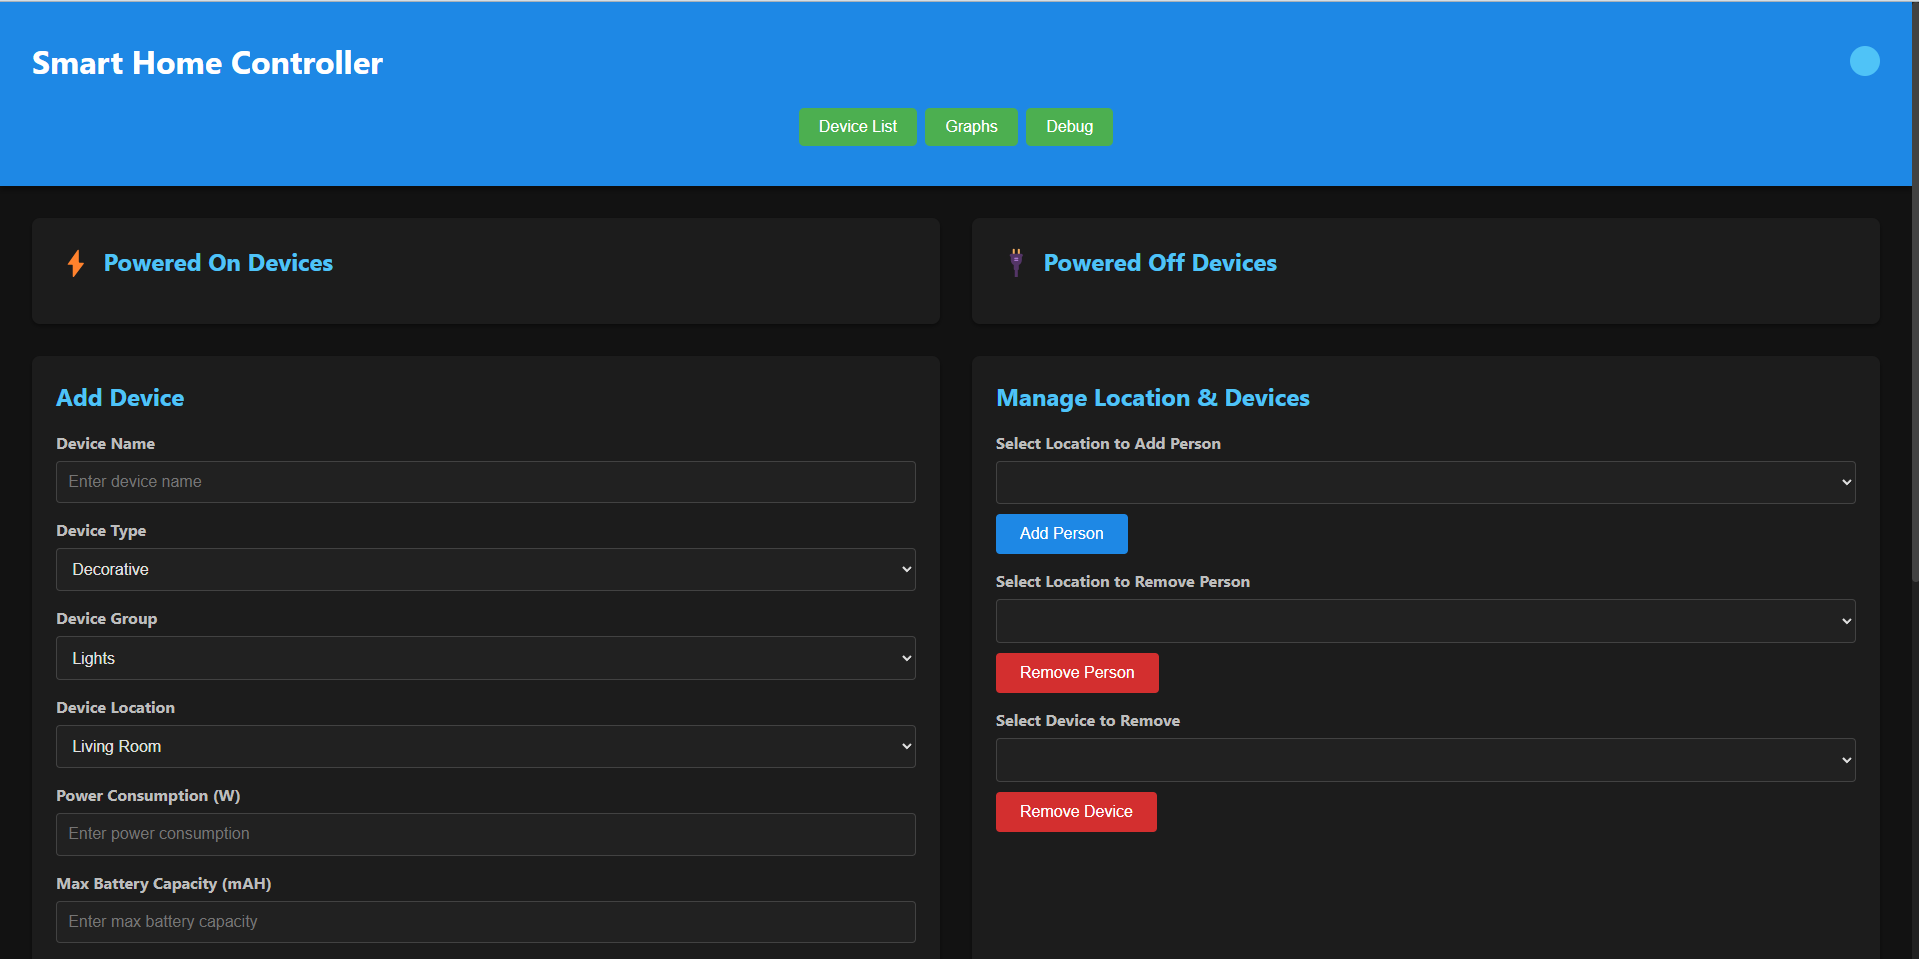

## Bugs & Future Plans

### Project Timeline

*   **Week 1:** Implement rule execution and test code
*   **Week 2:** Connect with frontend using Flask
*   **Week 3:** Identify and fix any bugs


### Known Bugs

*   **Device Removal:** Occasionally, device removal might be off by one element.
*   **Improper Logging** Logger logs much more than needed
*   **Sorting and Reversing:** Optimize the efficiency of sorting and reversing operations (presumably within the `LinkedList` or `Priority Queue`).